## Task 0

In [ ]:
#pip install -r requirements.txt

In [ ]:
#pip install nltk
#pip install matplotlib

In [47]:
import nltk; 
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [3]:
nltk.download('nps_chat')
nltk.download('webtext')
from nltk.book import *

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\wgkam\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
#pip install spacy scattertext

In [5]:
#!python -m spacy download en_core_web_sm

In [6]:
text3.concordance("earth")

Displaying 25 of 112 matches:
nning God created the heaven and the earth . And the earth was without form , a
d the heaven and the earth . And the earth was without form , and void ; and da
was so . And God called the dry land Earth ; and the gathering together of the 
it was good . And God said , Let the earth bring forth grass , the herb yieldin
upon the ear and it was so . And the earth brought forth grass , and herb yield
of the heaven to give light upon the earth , And to rule over the day and over 
fe , and fowl that may fly above the earth in the open firmament of heaven . An
 seas , and let fowl multiply in the earth . And the evening and the morning we
e fifth day . And God said , Let the earth bring forth the living creature afte
nd creeping thing , and beast of the earth after his ki and it was so . And God
s so . And God made the beast of the earth after his kind , and cattle after th
d every thing that creepeth upon the earth after his ki and God saw that it was
d over the

In [ ]:
text3.similar("man")

land lord men place woman earth waters well city lad day cattle field
wife way flood servant people famine pillar


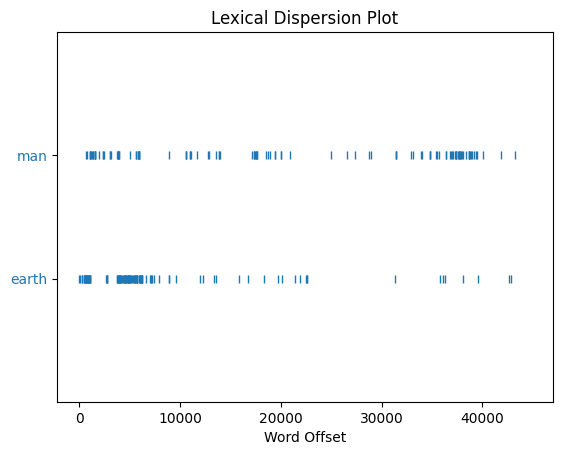

In [8]:
text3.dispersion_plot(["man", "earth"])

In [9]:
fdist = FreqDist(text3)
print(fdist)

<FreqDist with 2789 samples and 44764 outcomes>


In [10]:
fdist.most_common(50)

[(',', 3681),
 ('and', 2428),
 ('the', 2411),
 ('of', 1358),
 ('.', 1315),
 ('And', 1250),
 ('his', 651),
 ('he', 648),
 ('to', 611),
 (';', 605),
 ('unto', 590),
 ('in', 588),
 ('that', 509),
 ('I', 484),
 ('said', 476),
 ('him', 387),
 ('a', 342),
 ('my', 325),
 ('was', 317),
 ('for', 297),
 ('it', 290),
 ('with', 289),
 ('me', 282),
 ('thou', 272),
 ("'", 268),
 ('is', 267),
 ('thy', 267),
 ('s', 263),
 ('thee', 257),
 ('be', 254),
 ('shall', 253),
 ('they', 249),
 ('all', 245),
 (':', 238),
 ('God', 231),
 ('them', 230),
 ('not', 224),
 ('which', 198),
 ('father', 198),
 ('will', 195),
 ('land', 184),
 ('Jacob', 179),
 ('came', 177),
 ('her', 173),
 ('LORD', 166),
 ('were', 163),
 ('she', 161),
 ('from', 157),
 ('Joseph', 157),
 ('their', 153)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

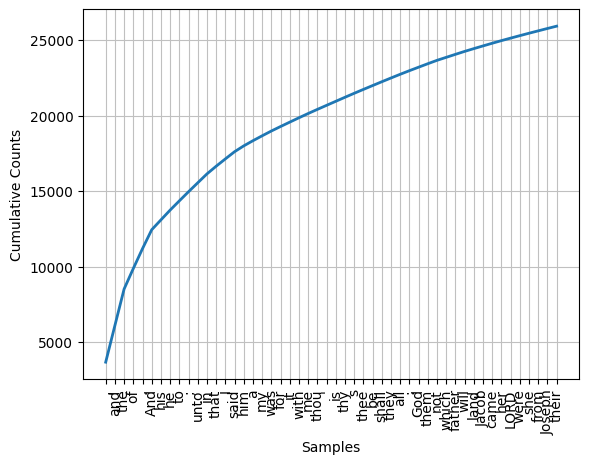

In [11]:
fdist.plot(50, cumulative=True)

## Task 1

### 1) words that are hapaxes (unique) and those that occur less than 5 times

In [35]:
text3_fdist = FreqDist(text3)

class FindFeatures(object):
    def __init__(self, fdist):
        self.fdist = fdist

    def less_than_five(self, text):
        return [word for word in text if self.fdist[word] < 5]
    
    def hapaxes(self, text):
        return self.fdist.hapaxes()

Finder = FindFeatures(tex3_fdist)

print(f'Less than five words: {Finder.less_than_five(text3_fdist)[:10]}')
print(f'Hapaxes: {Finder.hapaxes(text3_fdist)[:10]}')

Less than five words: ['darkness', 'dry', 'Se', 'abundantly', 'dominion', 'bearing', 'host', 'seventh', 'work', 'caused']
Hapaxes: ['form', 'void', 'Day', 'Night', 'firmame', 'Heaven', 'appe', 'Earth', 'signs', 'seasons']


### 2) draw a plot showing mapping from word length to word frequency

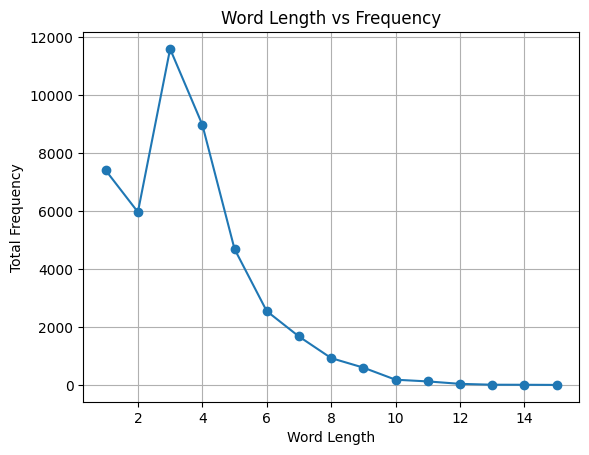

In [41]:
import matplotlib.pyplot as plt

length_freq = {length: sum(f for w, f in fdist.items() if len(w) == length)
               for length in set(len(w) for w in fdist)}

x, y = zip(*sorted(length_freq.items()))

plt.plot(x, y, marker='o')
plt.title('Word Length vs Frequency')
plt.xlabel('Word Length')
plt.ylabel('Total Frequency')
plt.grid(True)
plt.show()



### 3) find 10 most frequent words occurring at the end of the sentence

In [ ]:
raw = ' '.join(text3)

sentences = [s.strip() for s in raw.split('.') if s.strip()]
end_words = [s.split()[-1].lower() for s in sentences if s.split()]

fdist_end = FreqDist(end_words)
print("Top 10 words at sentence ends:", fdist_end.most_common(10))

Top 10 words at sentence ends: [('him', 56), ('earth', 30), ('me', 27), ('thee', 26), ('them', 25), ('son', 22), ('wife', 18), ('egypt', 18), ('it', 16), ('lord', 16)]


## Task 2

In [ ]:
with open('Quran.txt', 'r', encoding='utf-8') as f:
    raw = f.read()

tokens = nltk.word_tokenize(raw)
quran_text = nltk.Text(tokens)

print(quran_text[:20])  # First 20 tokens


['THE', 'HOLY', 'QURAN', '(', 'KORAN', ')', 'English', 'Translation', 'of', 'the', 'Meanings', 'by', 'Mohammad', 'Marmaduke', 'Pickthal', 'Formatting', 'by', 'William', 'B', '.']
